In [1]:
import spikeinterface
import spikeinterface.full as si # import core only
import spikeinterface.extractors as se
import spikeinterface.widgets as sw
import spikeinterface.preprocessing as spre
import matplotlib.pyplot as plt
import numpy as np
import mne
import warnings
import mne
import pandas as pd
warnings.simplefilter('ignore')

KeyboardInterrupt: 

In [ ]:
file = "/home/desktop/Desktop/22104412_Docs/MiceEpilepsy/5_1_24_L8_BEFOREPTZ_240105_163110_merged.rhs" #change ur file path
reader = se.read_intan(file,stream_name ='RHD2000 amplifier channel',use_names_as_ids=True)
#reader = se.read_edf(file)
recording_rhs = reader
#print(reader.channel_ids)
recording_rhs.annotate(is_filtered = False)

recording_rhs_1 = recording_rhs

recording_rhs = recording_rhs.channel_slice(['B-000', 'B-001' ,'B-002', 'B-004'])
recording_bp = spre.bandpass_filter(recording_rhs, freq_min=1, freq_max = 70 ) #bandpass filter
rec_cmr = spre.common_reference(recording_bp, operator="median", reference="global")  #rereferencing the data
rec_notch = spre.notch_filter(rec_cmr,q = 50)  #notch_filter
rec_resampled= spre.resample(rec_notch, 2000)

rec_resampled.get_total_duration()
Channel_ids = rec_resampled.get_channel_ids()
fs = rec_resampled.get_sampling_frequency()
num_chan = rec_resampled.get_num_channels()
num_segments = rec_resampled.get_num_segments()

print("Channel_ids = ", Channel_ids)
print("Sampling_frequency = ", fs)
print("Number of Channels = ", num_chan)
print("Number of segments = ", num_segments)
print('Total_rec_duration = ', recording_rhs.get_total_duration())

Channel_ids =  ['B-000' 'B-001' 'B-002' 'B-004']
Sampling_frequency =  2000.0
Number of Channels =  4
Number of segments =  1
Total_rec_duration =  2013.4485333333334


In [ ]:
#Extracting channels in the form of list

def concatenate_channel_ids(Channel_ids):
    concatenated_string = ''.join(Channel_ids)
    result = [concatenated_string]
    return result

def separate_channel_ids(Channel_ids_string, chunk_size):
    Channels = [Channel_ids_string[i:i+chunk_size] for i in range(0, len(Channel_ids_string), chunk_size)]
    return Channels

result = concatenate_channel_ids(Channel_ids)

chunk_size = len(Channel_ids[0])

Channels = separate_channel_ids(result[0], chunk_size)
print(Channels)

Channels_ids = Channels


['B-000', 'B-001', 'B-002', 'B-004']


In [ ]:
Channel_ids = Channels
fs = 2000
time = [0,1000]
final_1 = []
for i in Channel_ids:
    d1 = (rec_resampled.get_traces(channel_ids = [i], start_frame = fs* time[0], end_frame = fs* time[1]))  #LFP band passed rec
    final_1.append(d1)

In [ ]:
#flattening for dataframe
flattened_final_1 = [arr.flatten() for arr in final_1]
df_1 = pd.DataFrame({channel_id: data for channel_id, data in zip(Channel_ids, flattened_final_1)})
print(df_1)

         B-000  B-001  B-002  B-004
0           20      0      0      0
1           14      2     -3     -7
2            6      7     -6    -15
3            4     16     -4    -18
4            1     24     -1    -20
...        ...    ...    ...    ...
1999995     -4      4    -13     23
1999996     -3      3    -13     24
1999997     -3      3    -13     24
1999998     -2      2    -13     23
1999999     -3      3    -13     24

[2000000 rows x 4 columns]


In [ ]:
import pandas as pd
file_path = "/home/desktop/Desktop/22104412_Docs/MiceEpilepsy/L8 EPILEPTIFORM DISCHARGES LABELLING - L8_163110.csv"
df_time = pd.read_csv(file_path)

In [ ]:
(df_time)

,Start time (sec),End time (sec),Epileptiform feature,Seizure,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0.000,4.600,SWD,NaN,NaN,NaN,NaN
1,6.630,25.329,SWD,NaN,NaN,NaN,Labeling of events has been done for first 100...
2,38.744,44.828,SWD,NaN,NaN,NaN,NaN
3,39.598,39.797,POLYSPIKES,NaN,NaN,NaN,NaN
4,85.195,94.518,SWD,NaN,NaN,NaN,NaN
5,87.840,88.090,POLYSPIKES,NaN,NaN,NaN,NaN
6,108.170,115.505,SWD,NaN,NaN,NaN,NaN
7,167.000,171.200,SWD,NaN,NaN,NaN,NaN
8,174.743,181.168,SWD,NaN,NaN,NaN,NaN
9,194.220,200.462,SWD,NaN,NaN,NaN,NaN


In [ ]:
sampling_freq = 2000
info = mne.create_info(list(Channel_ids), sfreq=sampling_freq, ch_types=['eeg'] * len(Channel_ids))

raw = mne.io.RawArray((df_1.values).T, info)

Creating RawArray with float64 data, n_channels=4, n_times=2000000
    Range : 0 ... 1999999 =      0.000 ...  1000.000 secs
Ready.


Using matplotlib as 2D backend.


inotify_add_watch(/home/desktop/.config/ibus/bus/7818ba96ad61454fa7e9d99240d0c71b-unix-1) failed: (No space left on device)


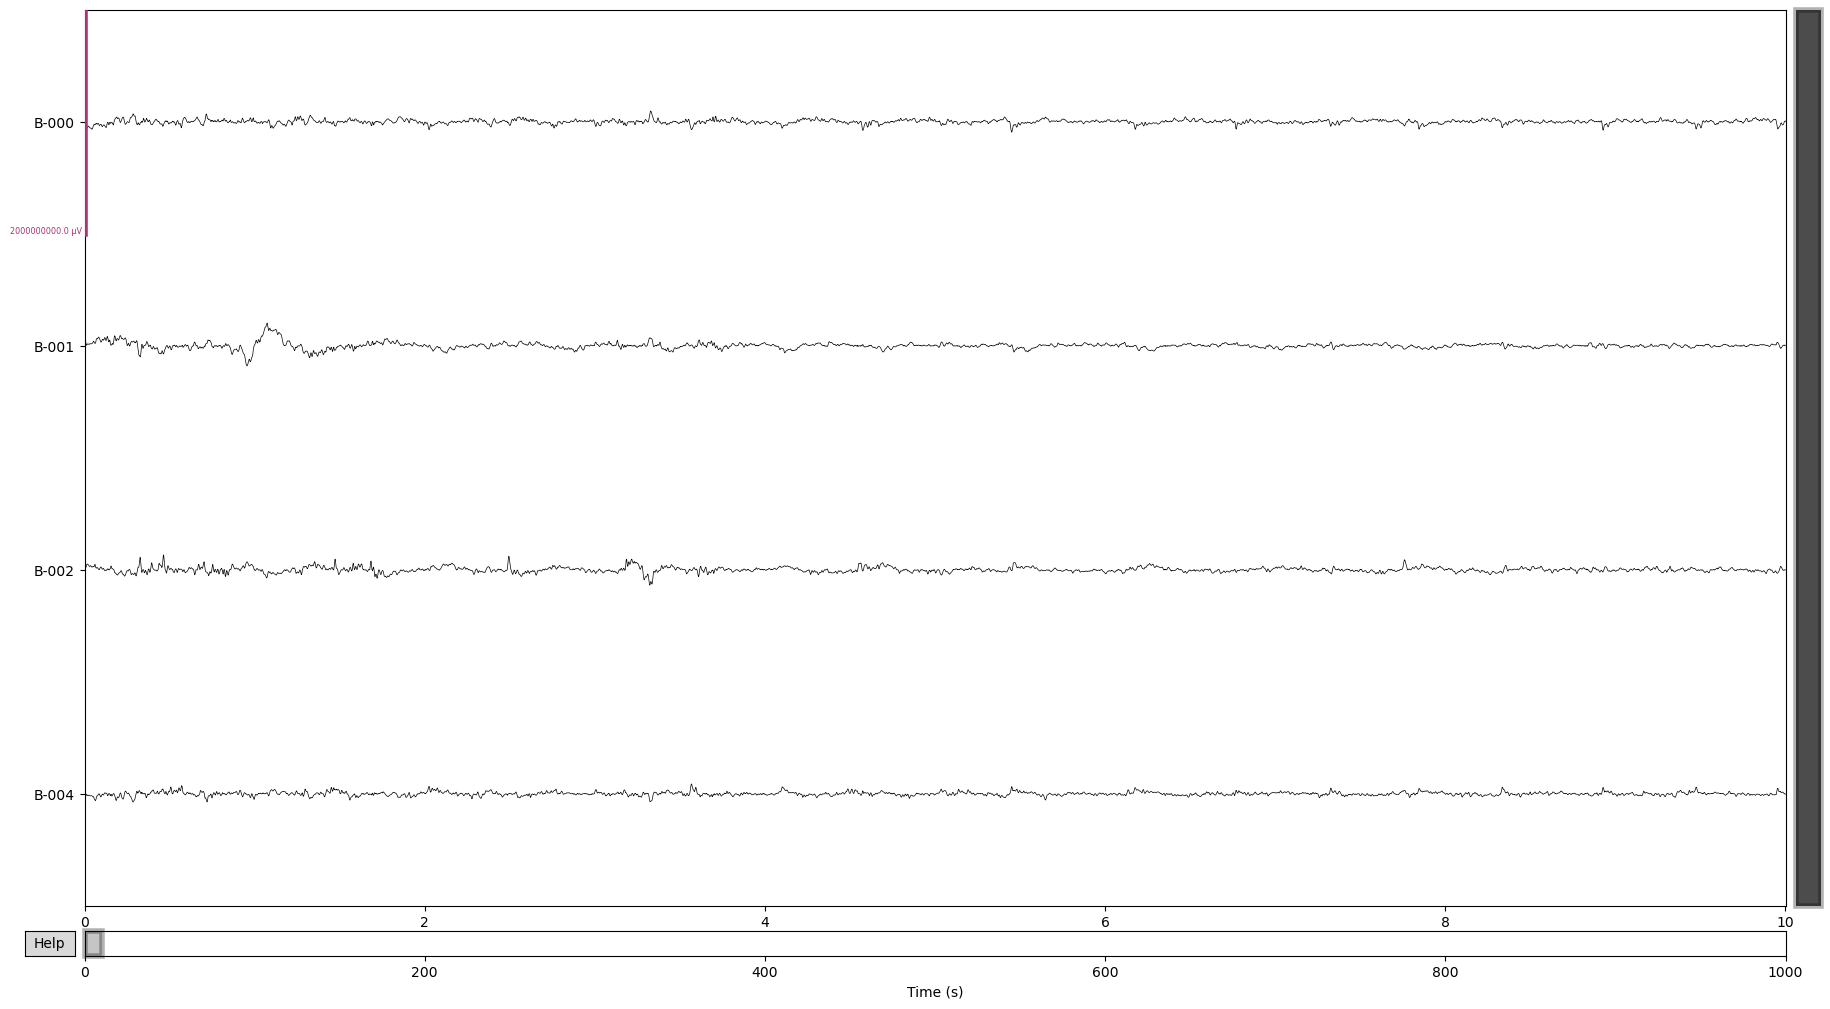

In [ ]:
%matplotlib qt
raw.plot(scalings=1e3)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 66001 samples (33.001 s)



Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 13201 samples (6.601 s)



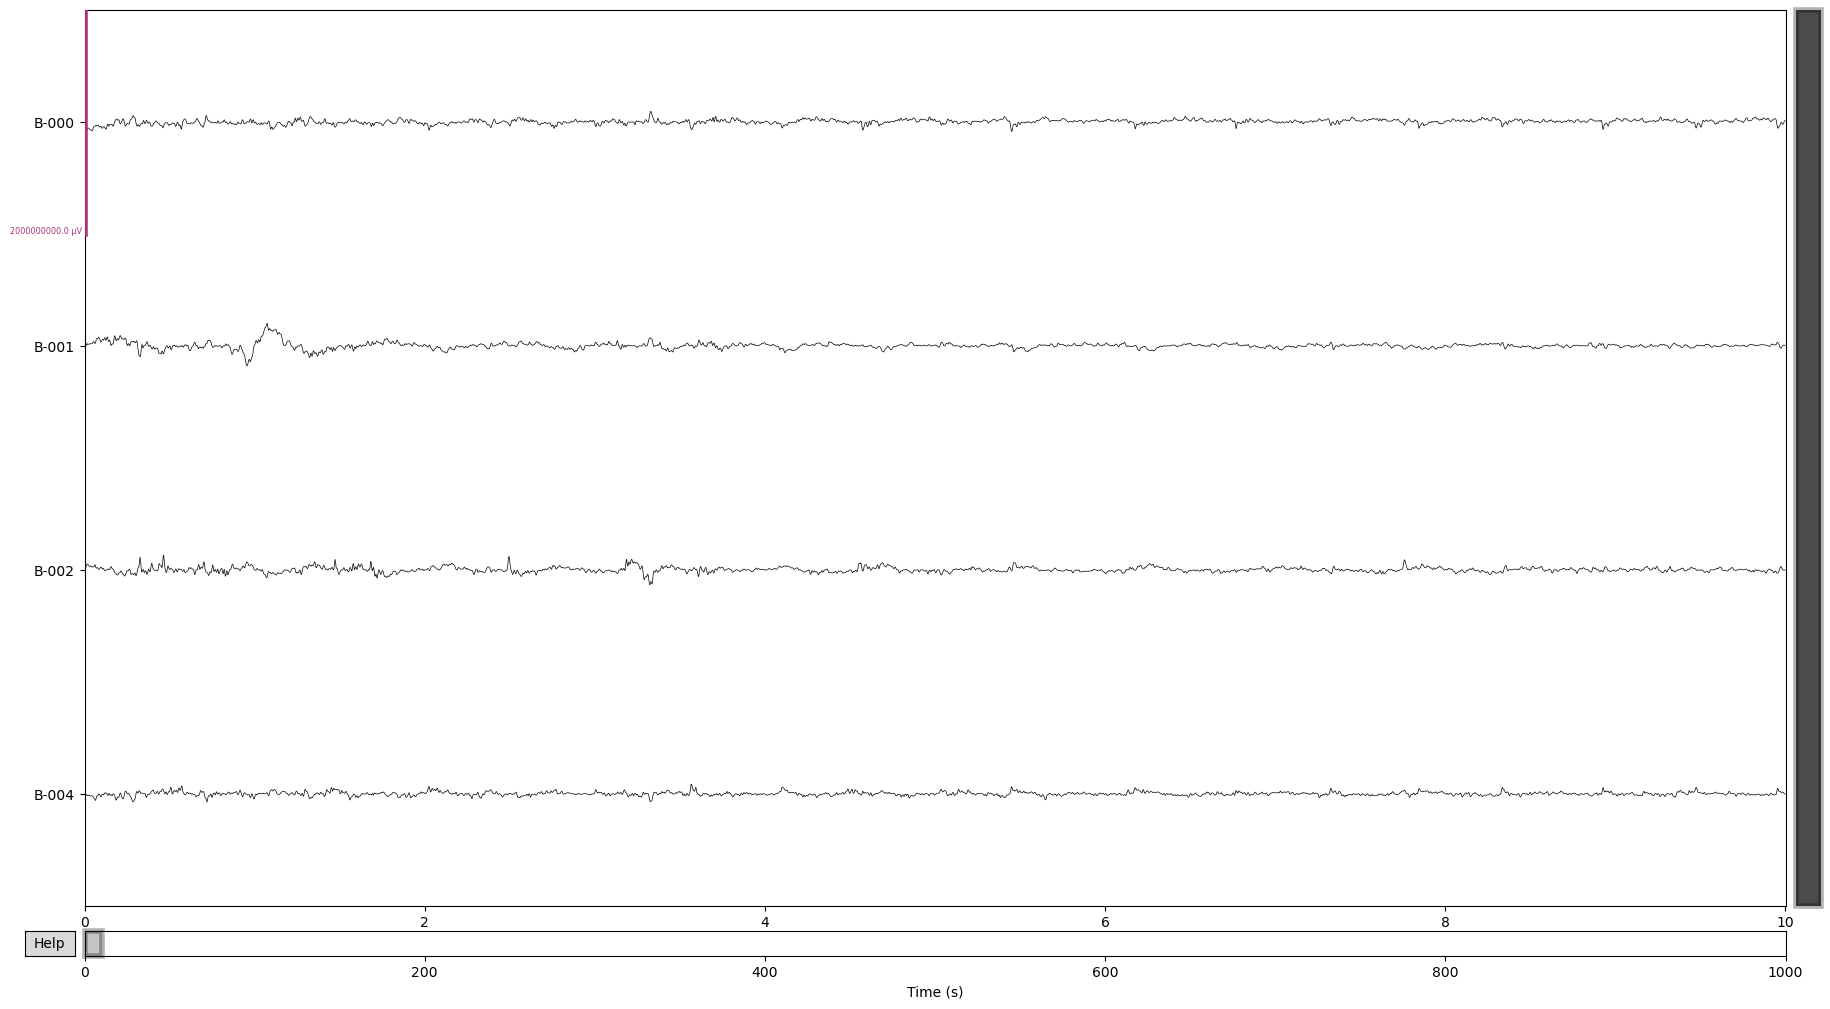

Channels marked as bad:
none


In [ ]:
raw.filter(0.1,100)
raw.notch_filter(50)
raw.plot(scalings = 1e3)

Effective window size : 1.024 (s)


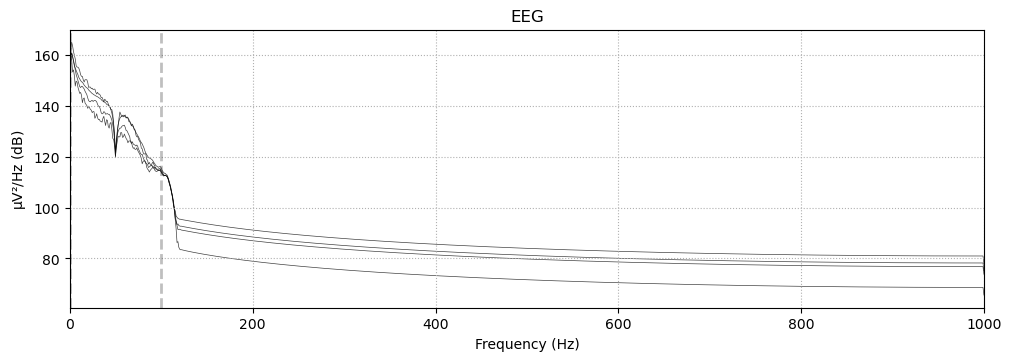

In [ ]:
raw.compute_psd().plot()

In [ ]:
data = raw.get_data()
data.shape

(4, 2000000)

In [ ]:
data_new = np.mean(data,0)
data_new = data_new[np.newaxis,:]
data_new.shape

(1, 2000000)

In [ ]:
sampling_freq = 2000
info = mne.create_info(['AVG'], sfreq=sampling_freq, ch_types=['eeg'])

raw_avg = mne.io.RawArray(data_new, info)

Creating RawArray with float64 data, n_channels=1, n_times=2000000
    Range : 0 ... 1999999 =      0.000 ...  1000.000 secs
Ready.


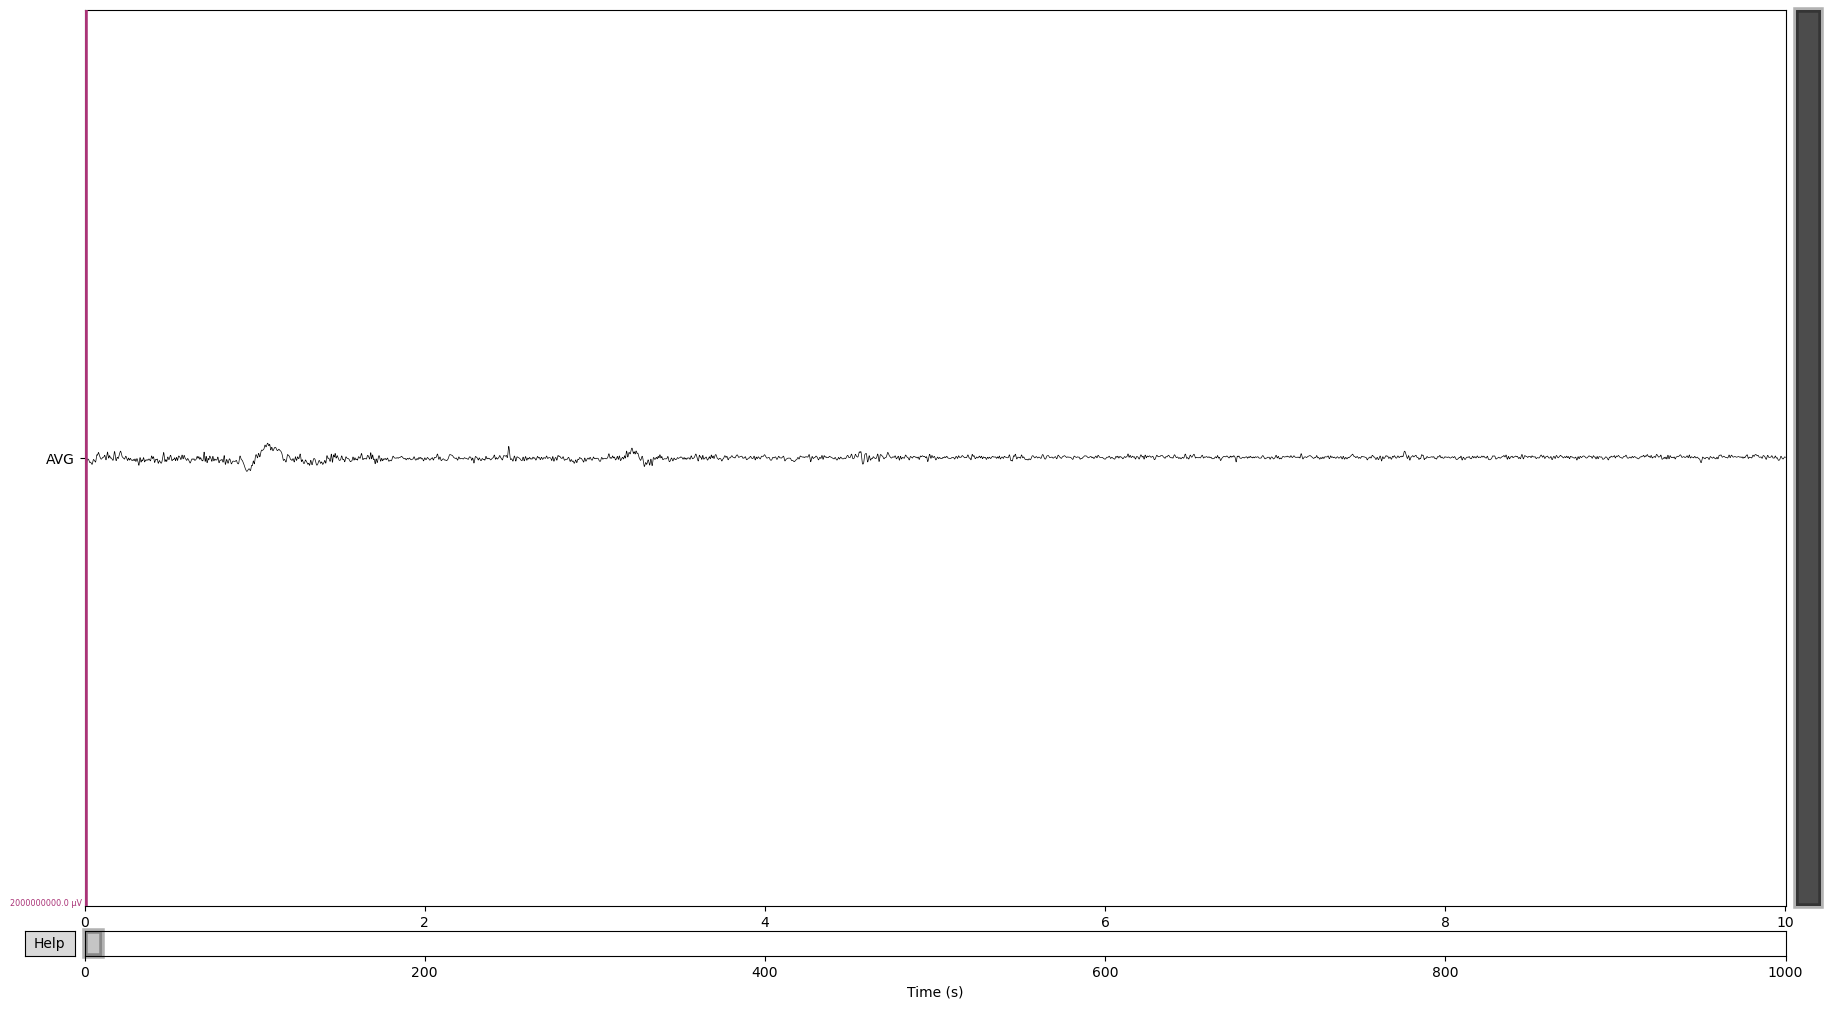

Channels marked as bad:
none


In [ ]:
raw_avg.plot(scalings = 1e3, title = 'Non-cleaned')

Effective window size : 1.024 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


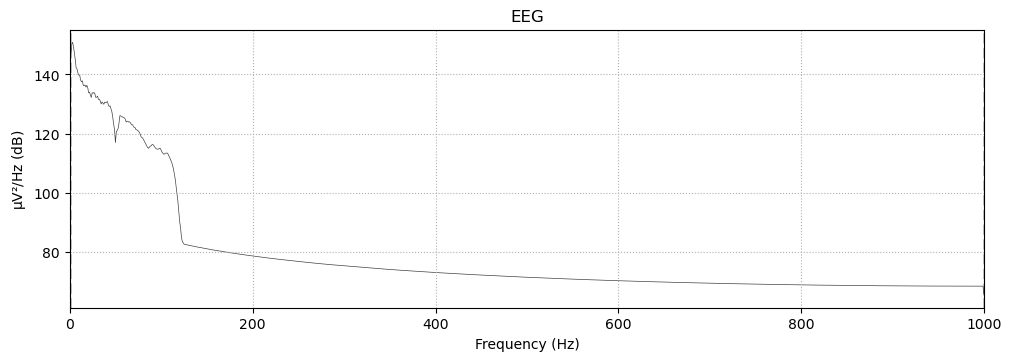

In [ ]:
raw_avg.compute_psd().plot()

In [ ]:
times_category = []

In [ ]:
for i in range(len(df_time)):
    times_category.append((df_time['Start time (sec)'][i],df_time['End time (sec)'][i], df_time['Epileptiform feature'][i]))
    if i <len(df_time)-1:
        if (df_time['Start time (sec)'][i+1] - df_time['End time (sec)'][i])>0:
            times_category.append((df_time['End time (sec)'][i], df_time['Start time (sec)'][i+1], 'Normal'))

In [ ]:
data.shape

(4, 2000000)

In [ ]:
import scipy.io as sio

In [ ]:
sio.savemat('Data_Testing_pre_cleaning.mat',{'data_4':data,
'data_mean': data_new})

Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
